# DEVnet Hackathon 2022: Analyzing Medical Cost Personal Datasets

The intention of this notebook is to serve as a hands on introduction to this year's Hackathon.

The idea is to analyze a given dataset in the context of insurance industry and ask ourselves: what kind of analysis can we do with this data, within the timeframe of the challenge and given that we want to create value for our customers?

## Overview

### Why the insurance sector?

The insurance sector has many applications for data science projects, spanning a wide field of [use cases](https://activewizards.com/blog/top-10-data-science-use-cases-in-insurance/). On top of that, there are many datasets openly available for exploration and analysis.

### Why this dataset?

With this is mind, we choose the [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) for this year's Hackathon. The data, part of one of Kaggle's competitions, is well-arranged and in good quality. Preprocessing won't be an issue for us, as we will see in the next section of this notebook.   

The dataset contains individual medical costs billed by health insurance and some potential predictor variables that inform on those medical costs. Login to Kaggle, download the dataset and store it in the `data` folder if you want to follow allong the exploratory data anlysis.

### Structure of this notebook

We will start with an initial look at the dataset and some meta informations. We will look at the target variable (individual medical cost) and some guidance on how to handle it. Then, we will look at the different types of variables present in our dataset: categorical variables and numerical variables, which in turn can be further subdivided into discrete and continuous variables. 

### Where to go from here

Work styles differ. In order to ensure that everyone has a satisfying experience during the upcoming coding sessions, we decided to refrain from setting an explicit task. Instead, ask yourselves: What has the data to offer? What kind of analysis would be interesting, promote innovation and create value for existing and future customers?

However, if you feel more comfortable with some explicit guidance, you can work on one of these problems instead:

- Create a supervised machine learning model for the prediction of individual medical costs (regression problem) 
- Create meaningful clusters (unsupervised learning) of different customer types and analyze their shares features
- Create a supervised machine learning model for the prediction of medical cost classes (classification problem; how would you feature engineer your classes from the given target variable?) 

There is no right or wrong choice. Also, the dataset is fairly simple, so don't overcomplicate and don't put too much pressure on yourselves!

>**NOTE**: This notebook follows closely the structure of github user "train in data"'s [course repo on CI/CD, notebook 01 data analysis](https://github.com/trainindata/deploying-machine-learning-models/tree/master/section-04-research-and-development) 

# A first look at the data

We start by importing the standard libraries and setting the data directory as well as the (optional) plotting style of matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-darkgrid')

data_dir = '../data/'

Lets read in the data and look at an aggregated description.

In [2]:
df = pd.read_csv(data_dir + 'insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values are found in this dataset.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


There are no missing datapoints, so we don't have to deal with imputation methods here. Also, the numercial variables do not show any heavily skewed distributions.

## Target variable

Lets view the histogram of our target variable, the individual medical costs, labeled in the data set as 'charges'.

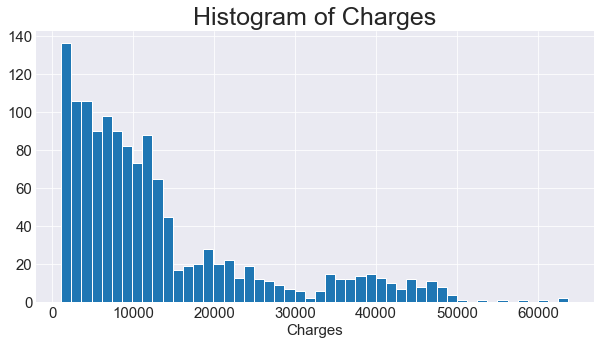

In [5]:
# histogran to evaluate target distribution

df['charges'].hist(bins=50,edgecolor='white',figsize=(10,5))
plt.xlabel('Charges',fontsize=15)
plt.title('Histogram of Charges',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We might consider applying mathematical transformations to the target variable, in order to improve the value spread. 

We can identify three regions with higher density ([0,15000],[15000,30000],[30000,50000]).
>Consider, if this might get relevant for your own analysis.

>How about transforming this into a classification problem? Based on the continuous range, how would you choose your classes?

# Variable types

Next, lets split the variables into disjoint sets: categorical and numerical variables. The numerical variables, in turn, will be split into discrete and continuous variables.

In [6]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in df.columns if df[var].dtype == 'O']

# number of categorical variables
len(cat_vars)

3

In [7]:
# now let's identify the numerical variables

num_vars = [
    var for var in df.columns if var not in cat_vars and var != 'charges'
]

# number of numerical variables
len(num_vars)

3

Note, that there are no (spatio-)temporal variables (geo coordinates or time series) in this dataset to consider. 

In [8]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  3


,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


next, we will apply the split into discrete and continuous variables. 

In [9]:
#  let's make a list of discrete variables
discrete_vars = [var for var in num_vars if df[var].dtype == 'int64']


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [10]:
# let's visualise the discrete variables

df[discrete_vars].head()

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0


## Discrete variables

Lets see the impact of discrete variabless on our target, in addition to their distribution.

Follow these tutorials to get an overview of what the seaborn methods [catplot](https://www.geeksforgeeks.org/python-seaborn-catplot/) and [strippplot](https://www.geeksforgeeks.org/stripplot-using-seaborn-in-python/) do and how they work. 

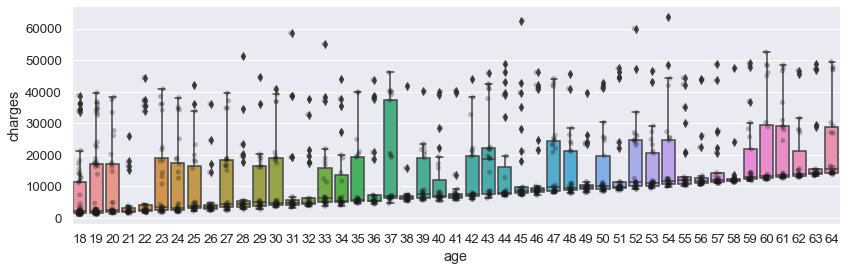

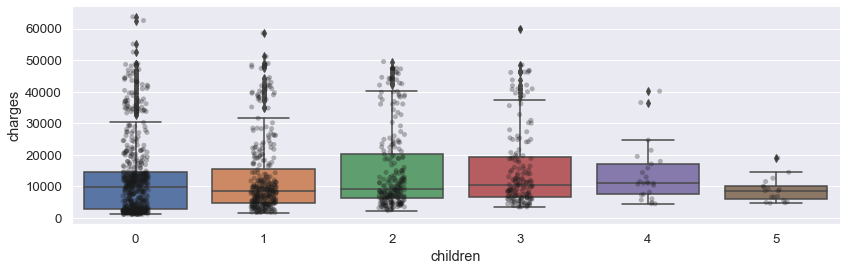

In [11]:
for var in discrete_vars:
    sns.set(font_scale=1.2)
    # make boxplot with Catplot
    sns.catplot(x=var, y='charges', data=df, kind="box", height=4, aspect=3)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='charges', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Both, `age` and `children` have an effect on the target. One might consider applying transformations to these variables in order to deal with skewness. 

## Continuous variables

Lets look at the histogramm of our (one) continuous variable and its effect on the target in a scatter plot 

In [12]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  1


In [13]:
# let's visualise the continuous variables

df[cont_vars].head()

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880


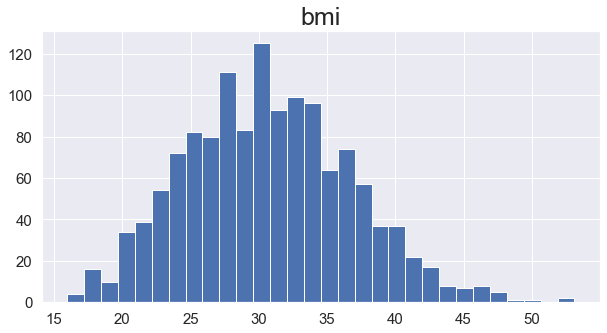

In [14]:
# lets plot histograms for all continuous variables

df[cont_vars].hist(bins=30, figsize=(10,5),edgecolor='white')
plt.title('bmi',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

It is roughly normally distributed. We could apply something like a log transformation to it and check its relationship with the target.

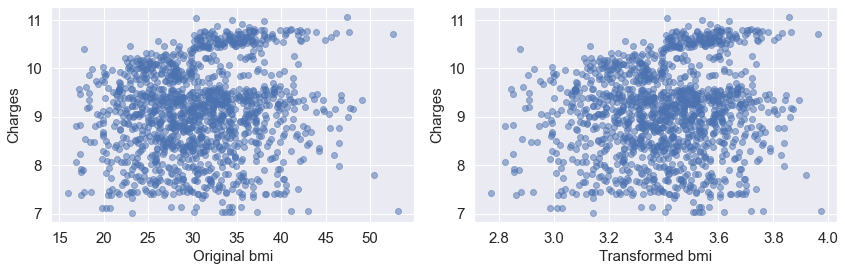

In [15]:
for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs charges
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['charges']),alpha=0.5)
    plt.ylabel('Charges',fontsize=15)
    plt.xlabel('Original ' + var,fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # plot transformed variable vs charges
    plt.subplot(1, 2, 2)
    plt.scatter(np.log(df[var]), np.log(df['charges']),alpha=0.5)
    plt.ylabel('Charges',fontsize=15)
    plt.xlabel('Transformed ' + var,fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.tight_layout()
    plt.show()

There are no aparrent differences, one might try different transformations though. 

## Correlation analysis

Lets look at the correlations in the numercial variables. 

In [16]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The variables seem to be uncorrelated.

## Categorical variables

In [17]:
# let's visualise the values of the categorical variables
df[cat_vars].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


Lets check the cardinality of our categorical variables.

Text(0.5, 1.0, 'Cardinality of categorical variables')

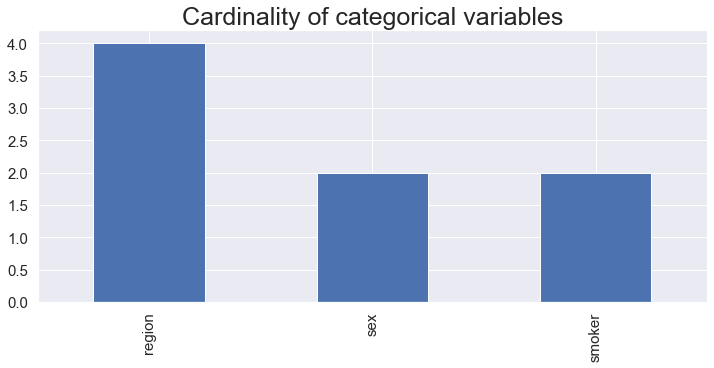

In [18]:
# we count unique categories with pandas unique() 
# and then plot them in descending order

df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Cardinality of categorical variables',fontsize=25)

The categorical variables show low cardinality, this means that they have only few different labels. Next, lets look at their frequency. 


In [19]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['charges'].count() / len(df)
    print(tmp)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_vars:
    print(analyse_rare_labels(df, var, 0.01))
    print()

sex
female    0.494768
male      0.505232
Name: charges, dtype: float64
Series([], Name: charges, dtype: float64)

smoker
no     0.795217
yes    0.204783
Name: charges, dtype: float64
Series([], Name: charges, dtype: float64)

region
northeast    0.242152
northwest    0.242900
southeast    0.272048
southwest    0.242900
Name: charges, dtype: float64
Series([], Name: charges, dtype: float64)



No rare labels are present in the dataset, which might cause overfitting.

Finally, as done for the discrete variables, lets look at their impact on the target.

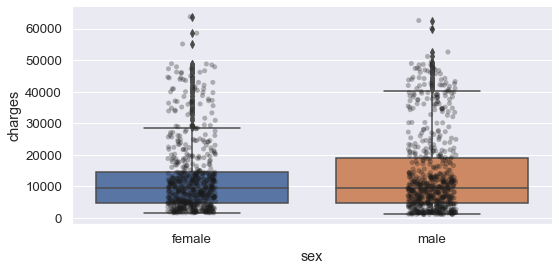

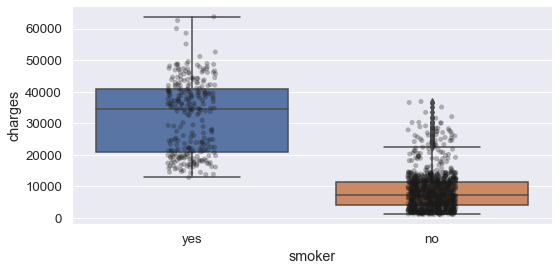

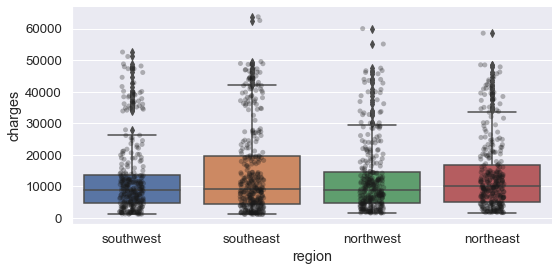

In [20]:
for var in cat_vars:
    sns.set(font_scale=1.2)
    # make boxplot with Catplot
    sns.catplot(x=var, y='charges', data=df, kind="box", height=4, aspect=2)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='charges', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

`smoker` seems to be a significant predictor (looking at the median and interqantile range of the target's distribution on the two categories {yes,no}). We see differences in the distributon's variance in the other two variables.